In [84]:
from qiskit.quantum_info import Operator
from qiskit.aqua.operators import WeightedPauliOperator,  X, Z, I, Y

In [85]:
pauli_dict = {
    'paulis': [{"coeff": {"imag": 0.0, "real": 0.5}, "label": "I"},
              {"coeff": {"imag": 0.0, "real": 0.5}, "label": "Z"},
              {"coeff": {"imag": 0.0, "real": 0.5}, "label": "X"},
              {"coeff": {"imag": 0.0, "real": 0.5}, "label": "Y"}
              ]
}
qubit_op = WeightedPauliOperator.from_dict(pauli_dict)

In [86]:

print(qubit_op.print_details())

I	(0.5+0j)
Z	(0.5+0j)
X	(0.5+0j)
Y	(0.5+0j)



In [87]:

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.circuit import ParameterVector
from qiskit.tools.visualization import circuit_drawer
from math import pi

In [88]:
def ansatz(theta):
    test=QuantumCircuit(2)
    test.rx(theta,0)
    test.cx(0,1)
    test.h(0)
    return test

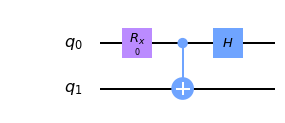

In [89]:
from qiskit.circuit import Parameter
theta = Parameter('0')
var_circ=ansatz(theta)
var_circ.draw(output='mpl',plot_barriers=1)

In [90]:
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import VQE, NumPyMinimumEigensolver ,ExactEigensolver
from qiskit.aqua.components.optimizers import COBYLA
from qiskit import Aer

In [91]:
optimizer = COBYLA(maxiter=100)
backend = Aer.get_backend('statevector_simulator')
vqe = VQE(operator=qubit_op, optimizer=optimizer, quantum_instance=backend)

In [92]:
vqe.var_form = var_circ
result = vqe.compute_minimum_eigenvalue()
print('VQE:', result.eigenvalue.real)

AquaError: 'The number of qubits of the variational form does not match the operator, and the variational form does not allow setting the number of qubits using `num_qubits`.'